# SVM

## Task 1: Exploratory Data Analysis (EDA)

1. Load the Mushroom Dataset and Perform Fundamental Data Exploration

In [2]:
import pandas as pd
df = pd.read_csv('mushroom.csv')
df.head()


,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245


In [3]:
df.describe()

,Unnamed: 0,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000
mean,624.974000,8.449118,12.314345
std,375.091938,3.697217,7.048845
min,0.000000,2.000000,1.000000
25%,290.000000,5.291009,5.723521
50%,607.000000,8.318596,12.124902
75%,957.250000,11.781272,18.698605
max,1279.000000,15.095066,25.000054


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

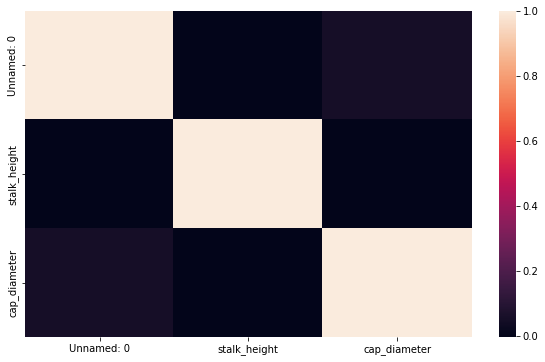

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# encoding categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df)
correlations = df.corr() #correlation can be found for dummy values also but it's a much bigger graph so I did only for original data

#heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlations, annot=False)
plt.show()


## 2. Utilize Histograms, Box Plots, or Density Plots to Understand Feature Distributions

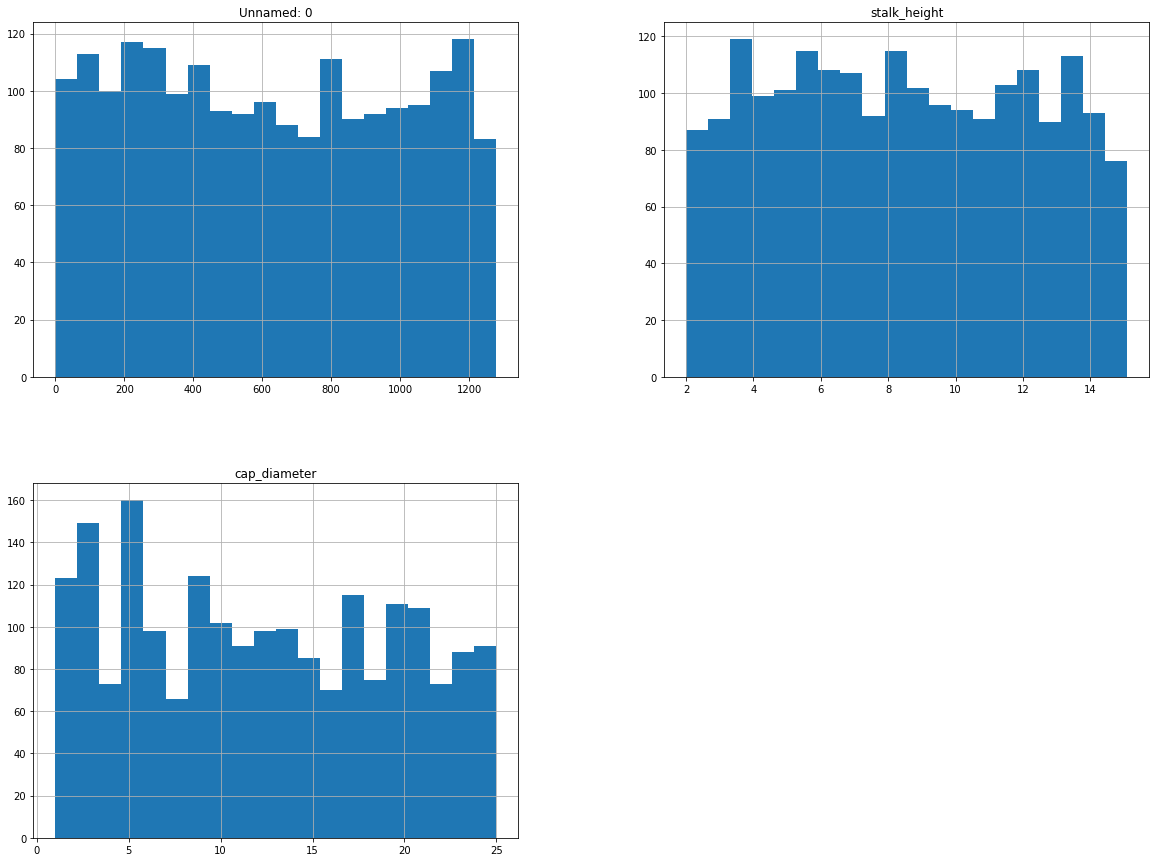

In [6]:
#histograms for numerical features
df.hist(bins=20, figsize=(20, 15))
plt.show()

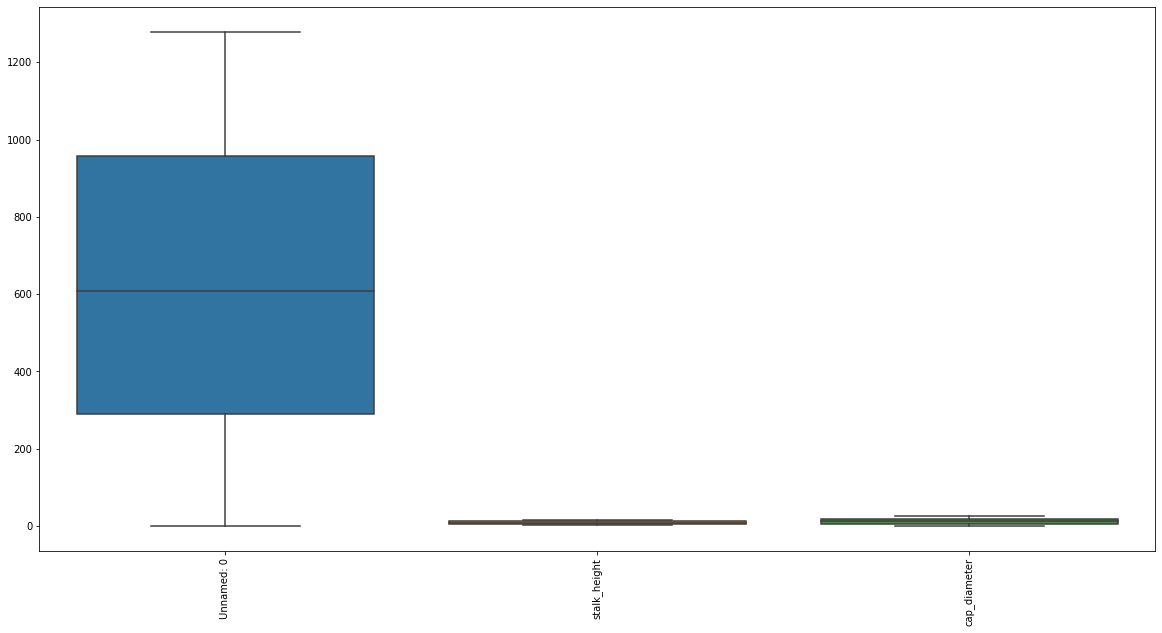

In [7]:
# Box plots
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

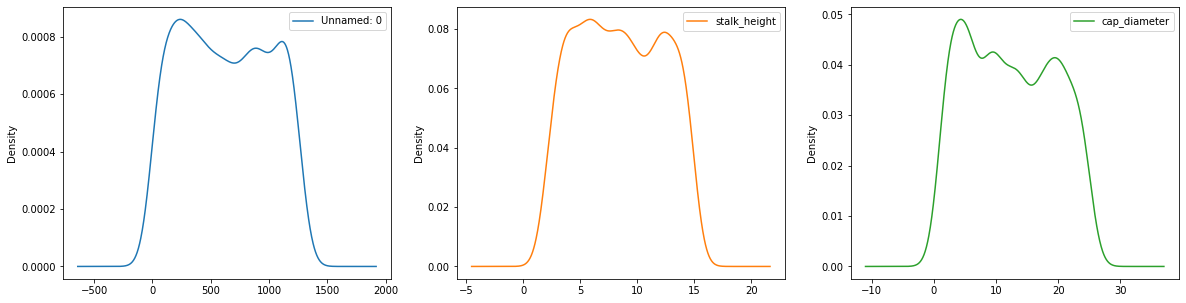

In [8]:
# Density plots 
# df_encoded.plot(kind='density', subplots=True, layout=(80, 3), sharex=False, figsize=(30, 20))
df.plot(kind='density', subplots=True, layout=(1, 3), sharex=False, figsize=(20, 5))
plt.show()

Task 2: Data Preprocessing

1. Split the Dataset into Training and Testing Sets

In [10]:
from sklearn.model_selection import train_test_split

x = df_encoded.drop(['class_edible', 'class_poisonous'], axis=1)
y = df_encoded['class_poisonous'] #target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print("x_train : {x_train.shape}")
print("x_test: {x_test.shape}")


x_train : {x_train.shape}
x_test: {x_test.shape}


## 3: Data Visualization

1. Employ Scatter Plots, Pair Plots, or Relevant Visualizations to Comprehend Feature Distributions and Relationships

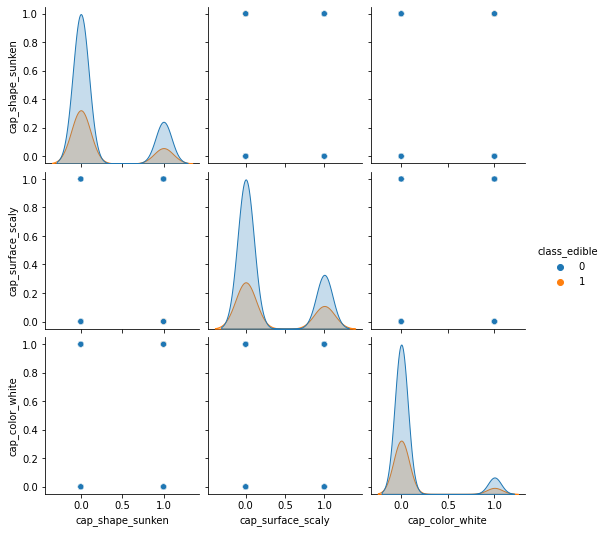

In [11]:
# pair plots
sns.pairplot(df_encoded[['cap_shape_sunken','cap_surface_scaly','cap_color_white','class_edible']], hue='class_edible')
plt.show()


2. Visualize Class Distributions to Gauge Dataset Balance or Imbalance

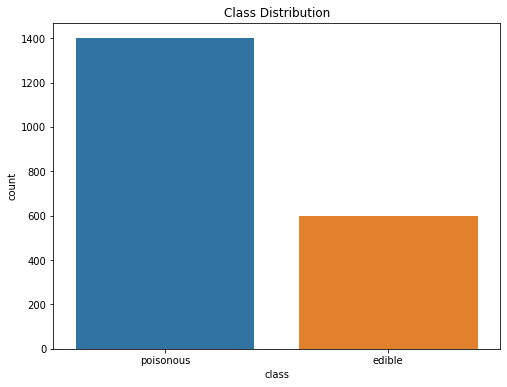

In [12]:
# class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()


## 4: SVM Implementation

1. Implement a Basic SVM Classifier Using Python Libraries like scikit-learn

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

#Initialize
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)

y_pred = svm.predict(x_test)


2. Evaluate Model Performance on the Testing Data Using Appropriate Metrics

In [14]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 17 116]
 [ 17 250]]
              precision    recall  f1-score   support

           0       0.50      0.13      0.20       133
           1       0.68      0.94      0.79       267

    accuracy                           0.67       400
   macro avg       0.59      0.53      0.50       400
weighted avg       0.62      0.67      0.59       400



# 5: Visualization of SVM Results

1. Visualize Classification Results on the Testing Data

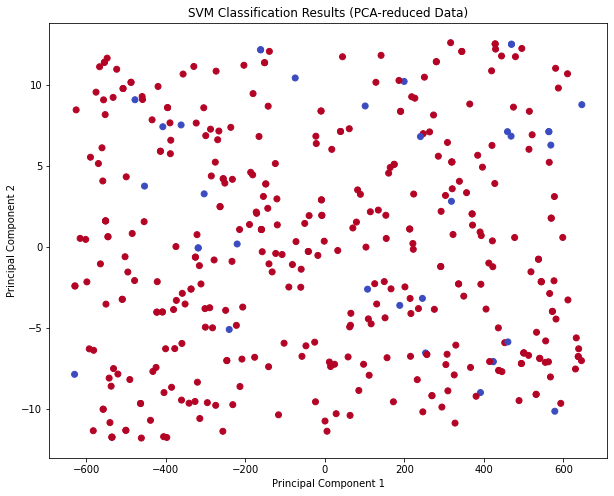

In [18]:
from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
x_test_pca = pca.fit_transform(x_test)

svm_pca = SVC(kernel='linear')
svm_pca.fit(x_train, y_train)
y_pred_pca = svm_pca.predict(x_test)

#classification results
plt.figure(figsize=(10, 8))
plt.scatter(x_test_pca[:,0], x_test_pca[:,1], c=y_pred_pca, cmap='coolwarm')
plt.title('SVM Classification')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


# 6: Parameter Tuning and Optimization

1. Experiment with Different SVM Hyperparameters

In [19]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC()

svm_model.fit(x_train, y_train)

# Predict using the trained model
svm_predictions = svm_model.predict(x_test)

print(confusion_matrix(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

[[  0 133]
 [  0 267]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7: Comparison and Analysis

1. Compare SVM Performance with Various Kernels

In [20]:
svm_linear = SVC(kernel='linear')
svm_rbf = SVC(kernel='rbf')
svm_poly = SVC(kernel='poly')
svm_sigmoid = SVC(kernel='sigmoid')

# Training and evaluate each model
for svm_model, kernel in zip([svm_linear, svm_rbf, svm_poly, svm_sigmoid], ['linear', 'rbf', 'poly', 'sigmoid']):
    svm_model.fit(x_train, y_train)
    y_pred_kernel = svm_model.predict(x_test)
    print(f"Kernel: {kernel}")
    print(confusion_matrix(y_test, y_pred_kernel))
    print(classification_report(y_test, y_pred_kernel))


Kernel: linear
[[ 17 116]
 [ 17 250]]
              precision    recall  f1-score   support

           0       0.50      0.13      0.20       133
           1       0.68      0.94      0.79       267

    accuracy                           0.67       400
   macro avg       0.59      0.53      0.50       400
weighted avg       0.62      0.67      0.59       400

Kernel: rbf
[[  0 133]
 [  0 267]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Kernel: poly
[[  0 133]
 [  0 267]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400

Kernel: sigmoid
[[ 44  89]
 [ 73 194]]
              precision    recall  f1-score   support

           0       0.38      0.33      0.35       133
           1       0.69      0.73      0.71       267

    accuracy                           0.59       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.58      0.59      0.59       400



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2. Analyze SVM Strengths and Weaknesses

Strengths:

* robust to overfitting
* various kernel trick
* effective for small and medium-sized dataset

Weaknesses:

* Computationally intensive for large datasets.
* Requires careful parameter tuning.
* Limited performance on noisy data i.e data overlapping which can affect margin 

3. Discuss Practical Implications of SVM in Real-World Classification Tasks

* SVMs are powerful tools for classification tasks, especially when the data is high-dimensional and has clear margins of separation.
* They can be used in various applications such as image classification, text categorization, and bioinformatics.